# Investigating Economic Indicators Datasets For Developed and Developing Countries


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The datasets used in this analysis was downloaded from :
* [Worldbank](https://data.worldbank.org/data-catalog/world-development-indicators) & [United Nations Development Programme](http://hdr.undp.org/en/data)
>
> The datasets provide different economic indicators such as GDP Growth, Inflation and HDI for 2 samples of countries (developed and developing) between 1995-2015.
>
> After looking through the content of the datasets.  I thought it would be interesting to look at the following questions:
* How different both developed and developing countries did during the past 20 years ?
* Can we predict future changes in these indicators for these countries ?
* For each of the given developed and developing countries which of them are doing better ?

In [1]:
import pandas as pd
from sklearn import linear_model 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# Reading Files
developed_Worldbank = pd.read_csv('developed.csv')
developing_Worldbank = pd.read_csv('developing.csv')
HDI_UnitedNations = pd.read_csv('hdi.csv')

In [3]:
developed_Worldbank.head()

,Time,Time Code,Country Name,Country Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],GDP per capita (current US$) [NY.GDP.PCAP.CD],GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Health expenditure, total (% of GDP) [SH.XPD.TOTL.ZS]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Population, total [SP.POP.TOTL]"
0,1995,YR1995,Norway,NOR,4.153951,34875.197388,3.614662,2.456405,6.307,7.716628,77.736585,4359184
1,1995,YR1995,Australia,AUS,3.889332,20384.669289,2.641878,4.638136,8.469,7.259735,77.829268,18072000
2,1995,YR1995,Germany,DEU,1.737641,31729.699763,1.439068,1.723671,8.158,9.431193,76.421951,81678051
3,1995,YR1995,Switzerland,CHE,0.480866,48540.577495,-0.188351,1.798719,3.327,9.334308,78.417073,7040687
4,1995,YR1995,United States,USA,2.718976,28782.175020,1.503065,2.805420,5.600,13.086654,75.621951,266278000


* Columns names need to be changed. Also the Time Code col and Country Code col are not relevant to the analysis and will be removed. 

In [4]:
developing_Worldbank.head()
developing_Worldbank.tail()

,Time,Time Code,Country Name,Country Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],GDP per capita (current US$) [NY.GDP.PCAP.CD],GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Health expenditure, total (% of GDP) [SH.XPD.TOTL.ZS]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Population, total [SP.POP.TOTL]"
205,2015,YR2015,South Africa,ZAF,1.298851,5769.772580,-0.294402,4.588271,25.150,NaN,61.934098,5.501198e+07
206,2015,YR2015,Mexico,MEX,2.629402,9143.128494,1.268508,2.720641,4.336,NaN,76.881366,1.258909e+08
207,2015,YR2015,China,CHN,6.900205,8069.211938,6.358383,1.437025,4.585,NaN,76.117098,1.371220e+09
208,2015,YR2015,Morocco,MAR,4.508410,2847.285569,3.039815,1.557907,9.700,NaN,75.520146,3.480332e+07
209,2015,YR2015,Thailand,THA,2.941235,5814.863134,2.580152,-0.900164,0.666,NaN,75.068000,6.865760e+07


* The HDI index data for 2015 is not available. Will find a way to populate the missing data. 

In [5]:
HDI_UnitedNations.head()

,HDI Rank (2015),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,169,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,75,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,83,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,32,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,150,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


* The dataset contains many more countries than the sample of countries used in this analysis. Will only get the data for the countries which are understudy.

In [6]:
developed_Worldbank.dtypes
developing_Worldbank.dtypes

Time                                                                                      int64
Time Code                                                                                object
Country Name                                                                             object
Country Code                                                                             object
GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]                                               float64
GDP per capita (current US$) [NY.GDP.PCAP.CD]                                           float64
GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]                                    float64
Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                                  float64
Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]    float64
Health expenditure, total (% of GDP) [SH.XPD.TOTL.ZS]                                   float64
Life expectancy at birth, total (years) 



### Data Cleaning 

> In the following cell we will perform initial cleaning :
>
* CleanFile_Eco (filename) - for the world bank files.
* CleanFile_HDI (filename) - United Nations Development Programme.

In [7]:
#Used to clean data from world bank

def CleanFile_Eco(filename):
    
    df = pd.read_csv(filename)
    
    #Renaming Columns
    df = df.rename(columns = {'Time':'Year',
                           'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]':'GDP Growth (%)',
                           'GDP per capita (current US$) [NY.GDP.PCAP.CD]':'GDP per capita (US$)',
                           'GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]':'GDP per capita growth (%)',
                           'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]':'Inflation (%)',
                           'Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]':'Unemployment (%)',
                           'Health expenditure, total (% of GDP) [SH.XPD.TOTL.ZS]':'Health expenditure (% of GDP)',
                           'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]':'Life expectancy (years)',
                           'Population, total [SP.POP.TOTL]':'Population'})
   
    #Dropping not needed columns
    df.drop('Country Code', axis=1, inplace=True) 
    df.drop('Time Code', axis=1, inplace=True)
    
    #convert Health expenditure column to float
    pd.to_numeric(df["Health expenditure (% of GDP)"])
    
    #Rounding Values
    #decimals = 2
    #df['Inflation (%)'] = df['Inflation (%)'].apply(lambda x: round(x,decimals))
    df = df.round(2)
        
    return df

#Used to clean HDI data from UNITED NATIONS DEVELOPMENT PROGRAMME
def CleanFile_HDI(filename):
    
    hd = pd.read_csv("hdi.csv")

    #sort file by ranking 
    hd = hd.sort_values("HDI Rank (2015)")
    
    #delete years before 1995
    hd.drop(hd.columns[2:7], axis=1, inplace=True)
    
    #Selecting specific countries
    developed_c = [' Norway', ' Australia', ' Germany', ' Switzerland', ' United States', ' France', ' Italy', ' Sweden', ' Canada', ' Austria']
    developing_c = [' Egypt', ' India', ' China', ' Mexico', ' Brazil', ' Iran', ' Morocco', ' Thailand', ' Turkey',' South Africa']

    developed_hdi = hd[hd.Country.isin(developed_c)]
    developing_hdi = hd[hd.Country.isin(developing_c)]

    #Reshaping table
    developed_hdi = developed_hdi.set_index('Country', 'HDI Rank (2015)')
    developing_hdi = developing_hdi.set_index('Country', 'HDI Rank (2015)')
    
    return developed_hdi, developing_hdi

In [8]:
# Developing Countries
developing_file = CleanFile_Eco("developing.csv")
# Developed Countries
developed_file = CleanFile_Eco("developed.csv")
# HDI index data for both developed and developing
developed_hdi, developing_hdi = CleanFile_HDI("hdi.csv")

developing_file.head(10)

,Year,Country Name,GDP Growth (%),GDP per capita (US$),GDP per capita growth (%),Inflation (%),Unemployment (%),Health expenditure (% of GDP),Life expectancy (years),Population
0,1995,Egypt,4.64,944.20,2.64,15.74,11.30,3.54,66.76,6.371439e+07
1,1995,Turkey,7.88,2897.87,6.18,88.11,7.64,2.51,66.98,5.848638e+07
2,1995,India,7.57,370.10,5.53,10.22,3.97,4.02,60.42,9.604828e+08
3,1995,Iran,2.40,1591.72,0.96,49.66,11.74,3.74,68.31,6.057564e+07
4,1995,Brazil,4.42,4840.79,2.75,66.01,9.91,6.51,67.60,1.622966e+08
5,1995,South Africa,3.12,3752.65,0.95,8.68,16.90,8.28,61.27,4.142681e+07
6,1995,Mexico,-5.76,3655.60,-7.46,35.00,6.89,5.06,72.74,9.404558e+07
7,1995,China,10.95,609.66,9.75,16.90,4.55,3.53,70.21,1.204855e+09
8,1995,Morocco,-5.41,1428.07,-6.85,6.12,22.90,3.55,66.78,2.707523e+07
9,1995,Thailand,8.12,2845.41,7.05,5.82,1.14,3.53,70.20,5.949179e+07


> In the Following cell :
* Country (country) - takes a country's name (str) and returns a dataframe with the country's data from all files but with missing values which we will address later.

In [9]:
#Retrieving Country info from all of the datasets

def Country(country):
    
    if country in developing_file['Country Name'].values: 
        df = developing_file.loc[developing_file['Country Name'] == country]
        hdi = developing_hdi.T
        hdi = hdi[' ' + country]
        hdi = pd.DataFrame({'HDI':hdi.values,'Time':hdi.index})
        hdi = hdi.drop(hdi.index[0])
        df = df.assign(HDI=hdi.HDI.values.round(3))
        return df
    
    elif country in developed_file['Country Name'].values: 
        df = developed_file.loc[developed_file['Country Name'] == country]
        hdi = developed_hdi.T
        hdi = hdi[' ' + country]
        hdi = pd.DataFrame({'HDI':hdi.values,'Year':hdi.index})
        hdi = hdi.drop(hdi.index[0])
        df = df.assign(HDI=hdi.HDI.values.round(3))
        return df
    else:
        print("Wrong Country Name")

In [10]:
Country('Egypt').dtypes

Year                               int64
Country Name                      object
GDP Growth (%)                   float64
GDP per capita (US$)             float64
GDP per capita growth (%)        float64
Inflation (%)                    float64
Unemployment (%)                 float64
Health expenditure (% of GDP)    float64
Life expectancy (years)          float64
Population                       float64
HDI                              float64
dtype: object

In [11]:
Country('Egypt')

,Year,Country Name,GDP Growth (%),GDP per capita (US$),GDP per capita growth (%),Inflation (%),Unemployment (%),Health expenditure (% of GDP),Life expectancy (years),Population,HDI
0,1995,Egypt,4.64,944.20,2.64,15.74,11.30,3.54,66.76,63714386.0,0.577
10,1996,Egypt,4.99,1041.52,3.02,7.19,9.00,3.90,67.23,64933456.0,0.585
20,1997,Egypt,5.49,1185.72,3.55,4.63,8.40,4.61,67.66,66151117.0,0.592
30,1998,Egypt,4.04,1259.00,2.14,3.87,8.03,4.93,68.04,67378056.0,0.593
40,1999,Egypt,6.11,1321.80,4.17,3.08,7.95,5.26,68.34,68626664.0,0.606
50,2000,Egypt,5.37,1428.18,3.44,2.68,9.00,5.55,68.59,69905988.0,0.612
60,2001,Egypt,3.54,1370.72,1.62,2.27,9.26,5.75,68.78,71226940.0,0.617
70,2002,Egypt,2.37,1210.23,0.45,2.74,10.01,5.97,68.95,72590118.0,0.621
80,2003,Egypt,3.19,1120.87,1.25,4.51,11.00,5.41,69.10,73981942.0,0.623
90,2004,Egypt,4.09,1045.94,2.16,11.27,10.30,5.21,69.26,75381899.0,0.629


> In the Following cell we will take care of the missing HDI index data by using Linear Regression to populate the missing data :
> * Add_missing_HealthEx (country) - takes a country's name (str) and returns a dataframe with the country's data from all files.

In [12]:
def Add_missing_HealthEx(country):
    df = Country(country)
    
    x_values = df['Year'].values.reshape(-1, 1)
    x_values = x_values[:-1]
    y_values = df['Health expenditure (% of GDP)'].values
    y_values = y_values[:-1]

    body_reg = linear_model.LinearRegression()
    body_reg.fit(x_values, y_values)
    value = body_reg.predict(2015).round(2)
    
    #df.Year[df.Year == 2015].index # To find index of Year 2015
    df.loc[df.Year[df.Year == 2015].index, 'Health expenditure (% of GDP)'] = value
    return df

> In the Following cell we will perform the last cleaning step for the data :
> * Clean_Developing() - returns dataframe that contains all developing countries data and appends new columns 'Status' with value developing.
> *  Clean_Developed() - returns dataframe that contains all developed countries data and appends new columns 'Status' with value developed.
> * Country_Info(Country) - takes country's name and returns a complete and clean dataframe containing the all of the country's info

In [13]:
def Clean_Developing():
    developing_c = ['Egypt', 'India', 'China', 'Mexico', 'Brazil', 'Iran', 'Morocco', 'Thailand', 'Turkey','South Africa']
    data = pd.DataFrame()
    for country in developing_c:
        df = Add_missing_HealthEx(country)
        data = data.append(df)
    
    # Create new Status col and add it to the dataframe
    country_developing = np.repeat('Developing', 210)
    data['Status'] = country_developing
    return data
        
def Clean_Developed():
    developed_c = ['Norway', 'Australia', 'Germany', 'Switzerland', 'United States', 'France', 'Italy', 'Sweden', 'Canada', 'Austria']
    data = pd.DataFrame()
    for country in developed_c:
        df = Add_missing_HealthEx(country)
        data = data.append(df)
    
    # Create new Status col and add it to the dataframe
    country_developed = np.repeat('Developed', 210)
    data['Status'] = country_developed
    return data

def Country_Info(country):
    df = Add_missing_HealthEx(country)
    return df

In [14]:
e = Clean_Developed()
e

,Year,Country Name,GDP Growth (%),GDP per capita (US$),GDP per capita growth (%),Inflation (%),Unemployment (%),Health expenditure (% of GDP),Life expectancy (years),Population,HDI,Status
0,1995,Norway,4.15,34875.20,3.61,2.46,6.31,7.72,77.74,4359184,0.883,Developed
10,1996,Norway,5.03,37321.44,4.50,1.26,5.04,7.67,78.15,4381336,0.888,Developed
20,1997,Norway,5.28,36628.52,4.72,2.58,4.69,8.24,78.14,4405157,0.895,Developed
30,1998,Norway,2.62,34788.78,2.02,2.26,3.74,9.07,78.33,4431464,0.906,Developed
40,1999,Norway,2.01,36371.40,1.32,2.33,3.25,9.14,78.28,4461913,0.911,Developed
50,2000,Norway,3.21,38146.72,2.54,3.09,3.46,8.27,78.63,4490967,0.917,Developed
60,2001,Norway,2.09,38549.59,1.57,3.02,3.74,8.65,78.79,4513751,0.916,Developed
70,2002,Norway,1.44,43061.15,0.89,1.29,4.02,9.62,78.99,4538159,0.918,Developed
80,2003,Norway,0.92,50111.65,0.33,2.48,4.22,9.85,79.39,4564855,0.924,Developed
90,2004,Norway,3.96,57570.27,3.35,0.47,4.26,9.44,79.84,4591910,0.929,Developed


> In the Following cell we will save the cleaned data to csv.

In [15]:
# Save developed countries data
developed = Clean_Developed()
developed.to_csv('developed_countries.csv')
# Save developing countries data
developing = Clean_Developing()
developing.to_csv('developing_countries.csv')
# Save all data in one file
all_data = developing.append(developed).sort_values('Year')
all_data.to_csv('AllData.csv')

<a id='eda'></a>
## Exploratory Data Analysis

> **Indicators Definitions**: 
> * GDP growth (annual %) : Annual percentage growth rate of GDP at market prices based on constant local currency.
> * GDP per capita (current US) : GDP per capita is gross domestic product divided by midyear population.
> * GDP per capita growth (annual %) : Annual percentage growth rate of GDP per capita based on constant local currency.
> * Inflation, consumer prices (annual %) : Inflation as measured by the consumer price index reflects the annual percentage change in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals.
> * Unemployment (% of total labor force) : Unemployment refers to the share of the labor force that is without work but available for and seeking employment.
> * Health expenditure (% of GDP) : Total health expenditure is the sum of public and private health expenditure.
> * Life expectancy at birth (years) : Life expectancy at birth indicates the number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life.
> * Population : Total population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are midyear estimates.
> * HDI : is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living.

### Research Question 1 : How different both developed and developing countries did during the past 20 years ?
> ### Will explore this question using the graphs below.
> In the following 2 cells : summary statistics for developed and developing countries 

In [16]:
developed.describe().drop('Year', axis=1, inplace=False)

,GDP Growth (%),GDP per capita (US$),GDP per capita growth (%),Inflation (%),Unemployment (%),Health expenditure (% of GDP),Life expectancy (years),Population,HDI
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,2.100000e+02,210.000000
mean,2.023714,42126.228905,1.335810,1.748810,6.752619,10.264333,79.913333,5.808741e+07,0.887162
std,1.857651,17595.480059,1.862664,1.076145,2.527828,2.047915,1.708264,8.351414e+07,0.032135
min,-5.620000,19517.840000,-5.990000,-1.140000,2.490000,7.100000,75.620000,4.359184e+06,0.799000
25%,1.090000,29781.270000,0.522500,0.952500,4.692500,9.027500,78.632500,8.272080e+06,0.866250
50%,2.085000,39113.395000,1.510000,1.800000,6.260000,9.925000,79.985000,2.657167e+07,0.889500
75%,3.200000,49383.662500,2.532500,2.407500,8.502500,11.052500,81.297500,6.306074e+07,0.910750
max,5.990000,102910.440000,5.600000,5.240000,13.060000,17.860000,83.490000,3.208966e+08,0.949000


In [17]:
developing.describe().drop('Year', axis=1, inplace=False)

,GDP Growth (%),GDP per capita (US$),GDP per capita growth (%),Inflation (%),Unemployment (%),Health expenditure (% of GDP),Life expectancy (years),Population,HDI
count,210.000000,210.000000,210.000000,210.00000,210.000000,210.000000,210.000000,2.100000e+02,210.000000
mean,4.506571,4221.613143,3.145619,10.08600,9.200095,5.540333,69.868905,3.093153e+08,0.652876
std,3.641505,3128.970475,3.708781,14.72854,6.431186,1.542314,5.620035,4.608021e+08,0.071474
min,-7.630000,370.100000,-8.730000,-1.41000,0.580000,2.510000,52.560000,2.707523e+07,0.460000
25%,2.505000,1644.652500,0.962500,3.29250,4.237500,4.330000,68.125000,6.229216e+07,0.612000
50%,4.495000,3157.815000,3.020000,5.78000,8.800000,5.275000,71.095000,7.456869e+07,0.659000
75%,7.147500,5928.530000,5.552500,10.14750,11.735000,6.405000,74.035000,1.863726e+08,0.704000
max,14.230000,13167.470000,13.640000,88.11000,27.140000,8.830000,76.880000,1.371220e+09,0.774000


> In the Following cells :
> * Compare_bar(indicator) - takes indicator's name and plots a graph showing how both developed and developing countries did over the years.

In [18]:
developed_mean = developed.groupby('Year').mean()
developing_mean = developing.groupby('Year').mean()
#developing[developing['HDI'] >= 0.717]


In [19]:
def Compare_bar(indicator):
    x = developing_mean[indicator].values
    y = developed_mean[indicator].values

    # create plot
    years = developing['Year'].values
    n_groups = 21
    fig, ax = plt.subplots(figsize=(8,8))
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, x, bar_width,
                     alpha=opacity,
                     color='b',
                     label='Developing Countries')
 
    rects2 = plt.bar(index + bar_width, y, bar_width,
                     alpha=opacity,
                     color='r',
                     label='Developed Countries')

    plt.xlabel('years')
    plt.ylabel(indicator)
    plt.title('Mean {} Per Year'.format(indicator))

    plt.xticks(index + bar_width, years, rotation = 90)
    plt.legend()
    plt.tight_layout()
    plt.show()

> * As shown below Developed countries did better than Developing countries in these indicators.

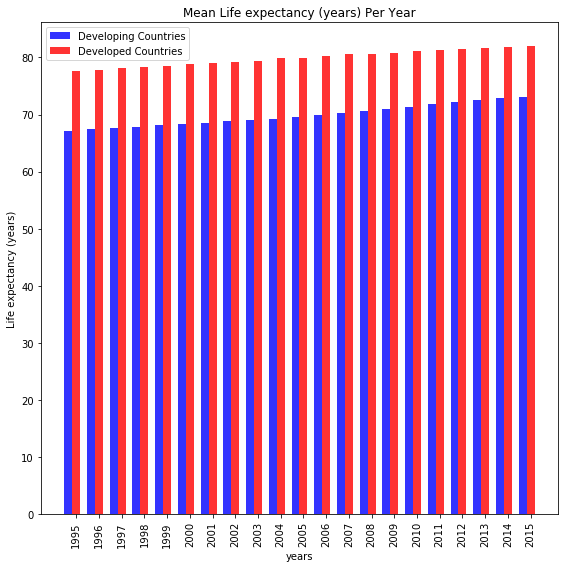

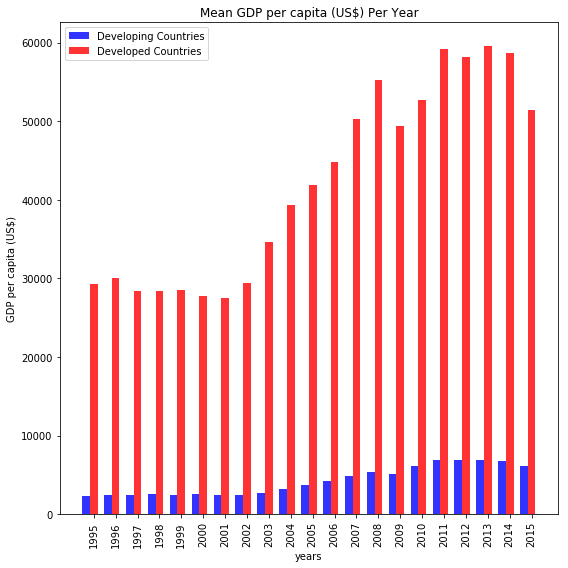

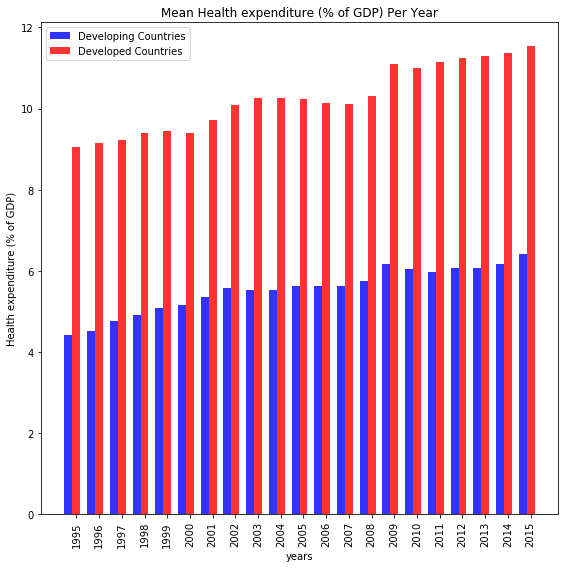

In [20]:
Compare_bar('Life expectancy (years)')
Compare_bar('GDP per capita (US$)')
Compare_bar('Health expenditure (% of GDP)')

> * As shown below Developing countries had larger percentages of Inflation and Unemployment than Developed countries. Whereas after 2000 they had better GDP per capita growth, which is expected for developing countries to have.

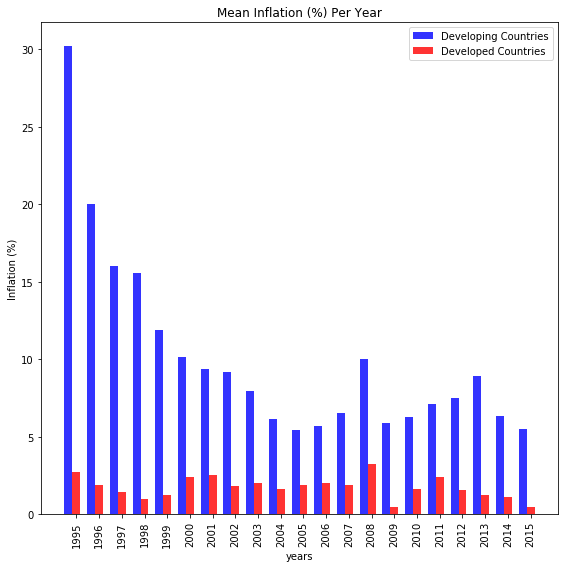

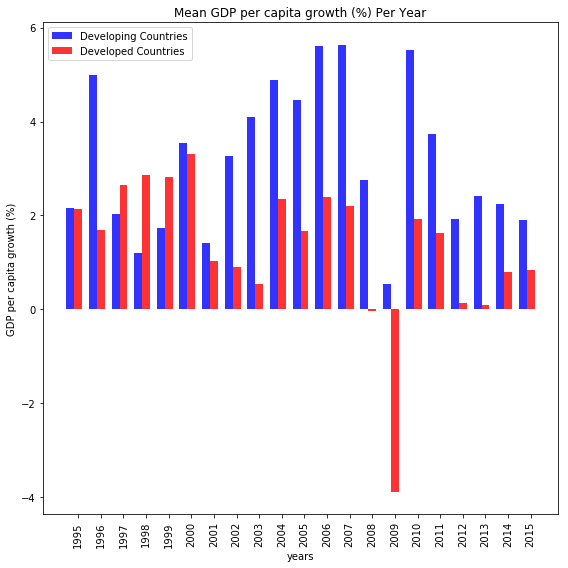

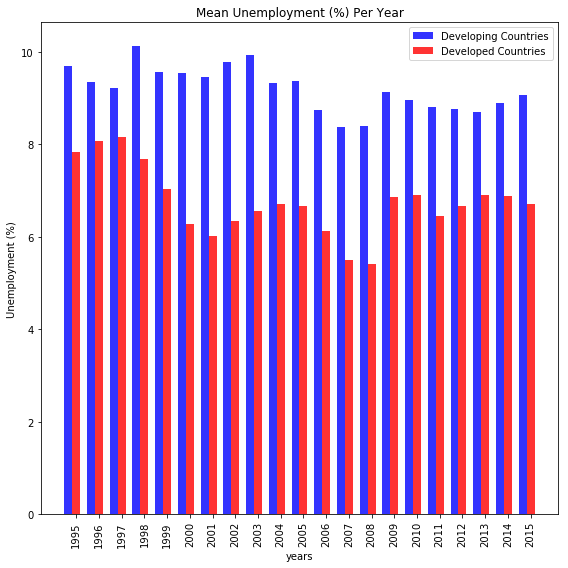

In [21]:
Compare_bar('Inflation (%)')
Compare_bar('GDP per capita growth (%)')
Compare_bar('Unemployment (%)')

> * As expected Developed Countries have much better HDI than Developing countries

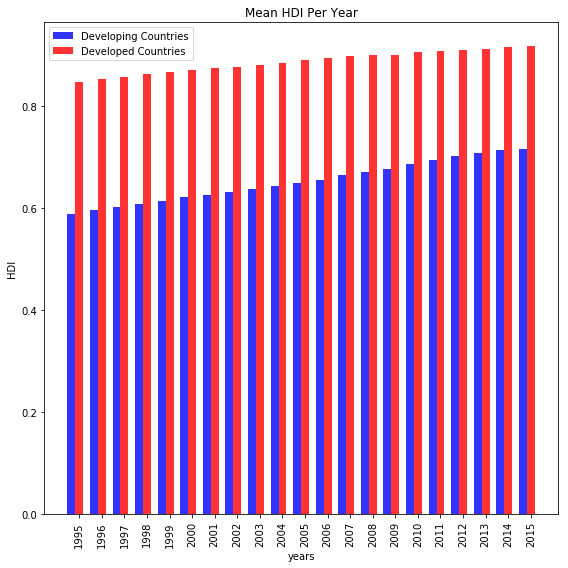

In [22]:
Compare_bar('HDI')

### Research Question 2 : Can we predict future changes in these indicators for these countries ?
> ### The Linear Regression model below uses the data to predict future changes.
> * NOTE: estimated values could be different from real values
   because there're alot of other factors that are taken into consideration 
   when predicting the real values.

In [23]:
#Simple Linear Regression to predict changes in Indicators

def Predict_Indicator(indicator, year, country):
    
    data = Country_Info(country)
    
    #Linear Regression
    x_values = data['Year'].values.reshape(-1, 1)
    y_values = data[indicator].values

    body_reg = linear_model.LinearRegression()
    body_reg.fit(x_values, y_values)
    plt.scatter(x_values, y_values) 
    plt.plot(x_values, body_reg.predict(x_values))
    plt.xlabel("Years")
    plt.ylabel(indicator)
    plt.show()
    print("{} is predicted to be at {} for the year {} in {} ".format(indicator, body_reg.predict(year).round(2), year, country))
    

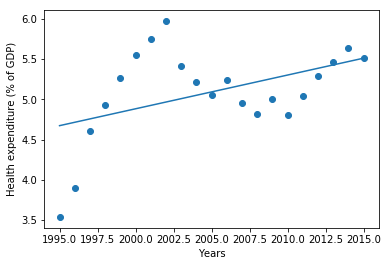

Health expenditure (% of GDP) is predicted to be at [ 5.72] for the year 2020 in Egypt 


In [24]:
# Example 
Predict_Indicator('Health expenditure (% of GDP)', 2020, 'Egypt')

### Research Question 3 : For each of the given developed and developing countries which of them are doing better ?
> ### For this question we will look at 2 Indicators : HDI & Unemployment.
> In the Following cells :
> * Compare_Line (indicator, status) - takes indicator's name and status variable to indicate which category Developed or Developing. Then plots a graph showing how all developed or developing countries did over the years with regard to that indicator.

In [25]:
def Compare_Line (indicator, status):
    color= {'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'}
    
    temp_developing = developing['Country Name'].tolist()
    temp_developed = developed['Country Name'].tolist()
    
    if status == 'Developed':
        temp = temp_developed
    elif status == 'Developing':
        temp = temp_developing
    else :
        print('Wrong Status Value')
        
    temp = set(temp)
    temp = list(temp)
    
    egy = Country_Info('Egypt')
    x = egy['Year'].tolist()
   
    fig, ax = plt.subplots(figsize=(10,8))

    for i in temp:
        df = Country_Info(i)
        y = df[indicator].tolist()
        plt.scatter(x, y)
        plt.plot(x,y, label= i, linewidth=3)
    
    plt.title("{} Countries ({})".format(status, indicator))
    plt.ylabel("HDI")
    plt.xlabel("Years")
    plt.legend()
    plt.xticks(rotation = 0)
    plt.show()

> As shown in the graphs below :
> * All countries Developed and Developing have their HDI index increasing.
> * Developed Countries : According to this sample dataset - Norway has the highest HDI whereas Italy has the lowest.
> * Developing Countries : According to this sample dataset - Iran has the highest HDI whereas India has the lowest.

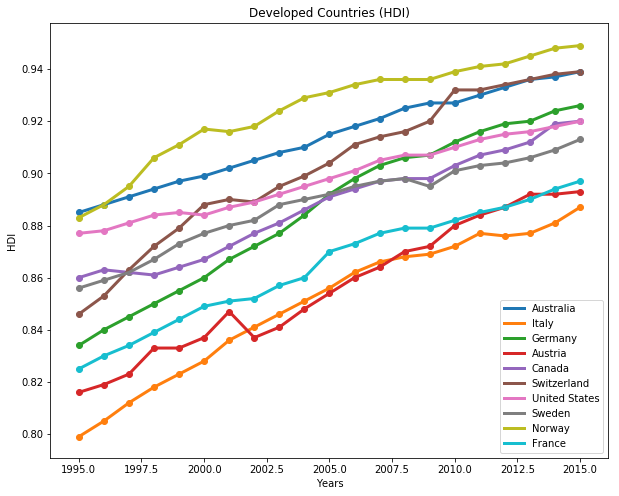

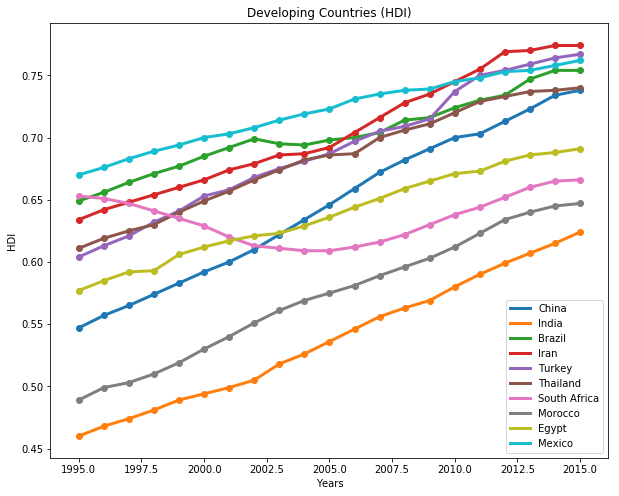

In [26]:
Compare_Line('HDI', 'Developed')
Compare_Line('HDI', 'Developing')

> As shown in the graphs below :
> * Developed Countries : According to this sample dataset - during the past few years Norway had the lowest unemployment rate whereas Italy had the highest.
> * Developing Countries : According to this sample dataset - South Africa had the highest unemployment rate where as Thailand had the lowest.

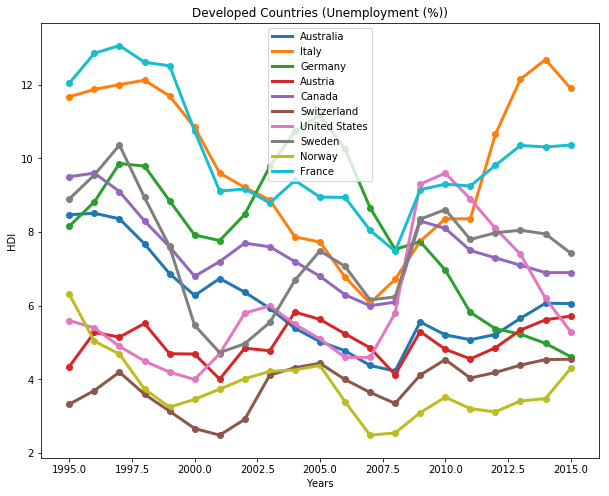

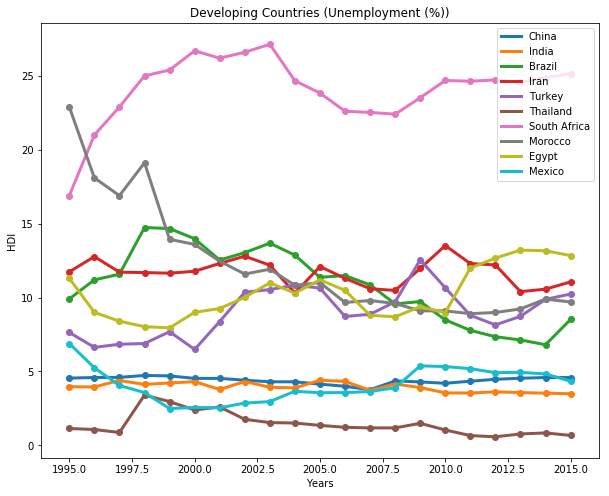

In [27]:
Compare_Line('Unemployment (%)', 'Developed')
Compare_Line('Unemployment (%)', 'Developing')

<a id='conclusions'></a>
## Conclusions

> After analyzing the datasets we can see that :
> * Developed Countries tend to do better in these indicators : Life expectancy, GDP per capita and Health expenditure.
> * Developing Countries have a problem with high percentages in these indicators : Inflation, Unemployment.
> * GDP per capita growth : as expected, Developing countries tend to have higher percentages than the already Developed countries.
> * HDI : as expected, Developed countries tend to have higher HDI values.

> Also we can improve the ability of Linear Regression to predict future values with more data and more indicators. But real world values could differ due to the complexity of real world problems and the ever changing geopolitical landscape.